In [1]:
import numpy as np
from matplotlib import pyplot as plt

This phantom is made of a 33 cm diameter cylinder of solid water with sixteen 2.8 cm diameter inserts of various tissue equivalent materials.

<img height="300px" src="gammex467.jpg" />

| InsertID | Materials         | Density ($g cm^3$) | $dE / dx (MeV cm ^{-1})$ | RSP   |
|----------|-------------------|--------------------|--------------------------|-------|
| 5        | LN300 lungs       | 0.30               | 1.023                    | 0.291 |
| 6 	   | LN450 lungs       | 0.45 	            | 1.552 	               | 0.442 |
| 3,15 	   | AP6 adipose       | 0.94 	            | 3.314 	               | 0.943 |
| 13 	   | BR12 breast       | 0.98 	            | 3.412 	               | 0.971 |
| 8,11 	   | Water solid CT    | 1.02 	            | 3.506 	               | 0.998 |
| 10 	   | Water insert 	   | 1.00 	            | 3.513 	               | 1.000 |
| 9 	   | BRN-SR2 brain 	   | 1.05 	            | 3.726 	               | 1.060 |
| 2,16 	   | LV1 liver 	       | 1.10 	            | 3.755 	               | 1.068 |
| 1 	   | IB inner bone 	   | 1.14 	            | 3.808 	               | 1.083 |
| 4 	   | B200 bone mineral | 1.15 	            | 3.843 	               | 1.093 |
| 7 	   | CB2-30% CaCO3 	   | 1.34 	            | 4.468 	               | 1.271 |
| 12 	   | CB2-50% CaCO3 	   | 1.56 	            | 5.051 	               | 1.437 |
| 14 	   | SB3 cortical bone | 1.82 	            | 5.733 	               | 1.631 |

Dauvergne, D., et al. "Monte Carlo comparison of x-ray and proton CT for range calculations of proton therapy beams." Physics in Medicine & Biology 60.19 (2015): 7585.

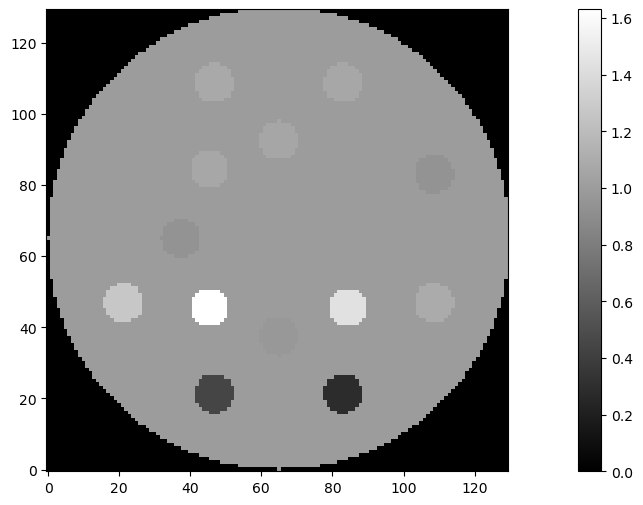

In [37]:
resolution = np.array([130, 130])
conversionFactor = 130 / 33e-3 # pixel / m

phantom = np.zeros(resolution)
center = resolution // 2
xx, yy = np.meshgrid(np.arange(resolution[1]), np.arange(resolution[1]))

# Water cylinder
water_radius = 33e-3 / 2 * conversionFactor
selection = np.where( np.linalg.norm(np.array([xx, yy]).T - center, axis=2) <= water_radius  )
phantom[selection] = 1.0

inlet_radius = 2.8e-3 / 2 * conversionFactor

# outer ring inlets
rsp_outer_inlets = np.array([
    1.083,
    1.068,
    0.943,
    1.093,
    0.291,
    0.442,
    1.271,
    0.998
])
outer_ring_radius = 12e-3 * conversionFactor
outer_ring_offset = np.pi/8
for outer_inlet in range(8):
    angle = 0 - outer_ring_offset + np.pi/4 * outer_inlet
    selection = np.where( np.linalg.norm(np.array([xx, yy]).T - center - np.array([np.cos(angle), np.sin(angle)]) * outer_ring_radius, axis=2) <= inlet_radius )
    phantom[selection] = rsp_outer_inlets[outer_inlet]

# inner ring inlets
rsp_inner_inlets = np.array([
    1.060,
    1.0,
    0.998,
    1.437,
    0.971,
    1.631,
    0.943,
    1.068
])
inner_ring_radius = 7e-3 * conversionFactor
inner_ring_offset = 0
for inner_inlet in range(8):
    angle = 0 - inner_ring_offset + np.pi/4 * inner_inlet
    selection = np.where( np.linalg.norm(np.array([xx, yy]).T - center - np.array([np.cos(angle), np.sin(angle)]) * inner_ring_radius, axis=2) <= inlet_radius )
    phantom[selection] = rsp_inner_inlets[inner_inlet]

plt.figure(figsize=(18,6))
plt.imshow(phantom, origin='lower', cmap='gray')
plt.colorbar()
plt.show()